In [149]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib

files = ['sensorTag_idle.csv', 'sensorTag_jumping.csv', 'sensorTag_pushup.csv', 'sensorTag_run.csv', 'sensorTag_situp.csv', 'sensorTag_walk.csv']

thisdict = {
  "0": "idle",
  "1": "jumping jack",
  "2": "push-up",
  "3": "running",
  "4": "sit-up",
  "5": "walking"
}

def read_data(filename):
    df = pd.read_csv(filename)
    df = df.drop(['Time', 'Temperature', 'Humidity', 'Pressure_Millibars'], 1)
    return df

In [150]:
from scipy import signal

temp_data = dict()
sensors = ['hax', 'hay', 'haz', 'hgx', 'hgy', 'hgz']
for i in range(len(files)):
    temp_data[i] = dict()
    temp_df = read_data(files[i])
    for j in range(len(temp_df)//50):
        temp = dict()
        temp['hax'] = temp_df.iloc[j*50:(j+1)*50, 0]
        temp['hay'] = temp_df.iloc[j*50:(j+1)*50, 1]
        temp['haz'] = temp_df.iloc[j*50:(j+1)*50, 2]
        temp['ham'] = ((temp['hax'].mul(temp['hax'])).add(temp['hay'].mul(temp['hay']))).add(temp['haz'].mul(temp['haz']))
        
        
        temp['hgx'] = temp_df.iloc[j*50:(j+1)*50, 3]
        temp['hgy'] = temp_df.iloc[j*50:(j+1)*50, 4]
        temp['hgz'] = temp_df.iloc[j*50:(j+1)*50, 5]
        temp['hgm'] = ((temp['hgx'].mul(temp['hgx'])).add(temp['hgy'].mul(temp['hgy']))).add(temp['hgz'].mul(temp['hgz']))
        """
        temp['hmx'] = temp_df.iloc[j*50:(j+1)*50, 6]
        temp['hmy'] = temp_df.iloc[j*50:(j+1)*50, 7]
        temp['hmz'] = temp_df.iloc[j*50:(j+1)*50:, 8]
        for sensor in sensors:
            _, temp[sensor + '_Pxx_spec'] = signal.periodogram(temp[sensor], fs=10) # Estimate power spectral density using a periodogram
            _, _, temp[sensor + '_Sxx_spec'] = signal.spectrogram(temp[sensor], fs=10, return_onesided=False) # Compute a spectrogram with consecutive Fourier transforms
        """
        temp_data[i][j] = temp

In [151]:
data = []
for i in range(6):
    for j in range(len(temp_data[i])):
        temp = dict()
        for key, value in temp_data[i][j].items():
            temp[key + '_mean'] = np.mean(value)
            temp[key + '_max'] = np.max(value)
            temp[key + '_min'] = np.min(value)
            temp[key + '_median'] = np.median(value)
            temp[key + '_std'] = np.std(value)
            temp[key + '_var'] = np.var(value)
            temp[key + '_p10'] = np.percentile(value, 10)
            temp[key + '_p25'] = np.percentile(value, 25)
            temp[key + '_p75'] = np.percentile(value, 75)
            temp[key + '_p90'] = np.percentile(value, 90)
        temp['activity'] = i
        data.append(temp)
        
for key,value in temp_data[0][0].items():
    print("'" + key + "_mean', " + "'" + key + "_max', " + "'" + key + "_min', " + "'" + key + "_median', " +
          "'" + key + "_std', " + "'" + key + "_var', " + "'" + key + "_p10', " + "'" + key + "_p25', " 
          + "'" + key + "_p75', " + "'" + key + "_p90', ", end="")

'hax_mean', 'hax_max', 'hax_min', 'hax_median', 'hax_std', 'hax_var', 'hax_p10', 'hax_p25', 'hax_p75', 'hax_p90', 'hay_mean', 'hay_max', 'hay_min', 'hay_median', 'hay_std', 'hay_var', 'hay_p10', 'hay_p25', 'hay_p75', 'hay_p90', 'haz_mean', 'haz_max', 'haz_min', 'haz_median', 'haz_std', 'haz_var', 'haz_p10', 'haz_p25', 'haz_p75', 'haz_p90', 'ham_mean', 'ham_max', 'ham_min', 'ham_median', 'ham_std', 'ham_var', 'ham_p10', 'ham_p25', 'ham_p75', 'ham_p90', 'hgx_mean', 'hgx_max', 'hgx_min', 'hgx_median', 'hgx_std', 'hgx_var', 'hgx_p10', 'hgx_p25', 'hgx_p75', 'hgx_p90', 'hgy_mean', 'hgy_max', 'hgy_min', 'hgy_median', 'hgy_std', 'hgy_var', 'hgy_p10', 'hgy_p25', 'hgy_p75', 'hgy_p90', 'hgz_mean', 'hgz_max', 'hgz_min', 'hgz_median', 'hgz_std', 'hgz_var', 'hgz_p10', 'hgz_p25', 'hgz_p75', 'hgz_p90', 'hgm_mean', 'hgm_max', 'hgm_min', 'hgm_median', 'hgm_std', 'hgm_var', 'hgm_p10', 'hgm_p25', 'hgm_p75', 'hgm_p90', 

Train Accuracy: 1.0 
Test Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0


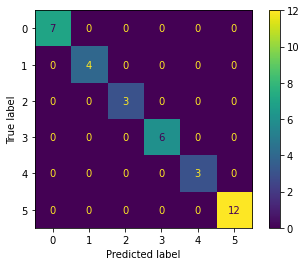

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.multiclass import OneVsOneClassifier

#Acuracy is 100% with hand + body sensor data, however sometimes there are wrong classifications for idle
#Before adding idle to the model it was always 100%
#Maybe we need more data for idle, also the data would likely be very different when standing/sitting etc.

df = pd.DataFrame(data, columns=['hax_mean', 'hax_max', 'hax_min', 'hax_median', 'hax_std', 'hax_var', 'hax_p10', 'hax_p25', 'hax_p75', 'hax_p90', 'hay_mean', 'hay_max', 'hay_min', 'hay_median', 'hay_std', 'hay_var', 'hay_p10', 'hay_p25', 'hay_p75', 'hay_p90', 'haz_mean', 'haz_max', 'haz_min', 'haz_median', 'haz_std', 'haz_var', 'haz_p10', 'haz_p25', 'haz_p75', 'haz_p90', 'ham_mean', 'ham_max', 'ham_min', 'ham_median', 'ham_std', 'ham_var', 'ham_p10', 'ham_p25', 'ham_p75', 'ham_p90', 'hgx_mean', 'hgx_max', 'hgx_min', 'hgx_median', 'hgx_std', 'hgx_var', 'hgx_p10', 'hgx_p25', 'hgx_p75', 'hgx_p90', 'hgy_mean', 'hgy_max', 'hgy_min', 'hgy_median', 'hgy_std', 'hgy_var', 'hgy_p10', 'hgy_p25', 'hgy_p75', 'hgy_p90', 'hgz_mean', 'hgz_max', 'hgz_min', 'hgz_median', 'hgz_std', 'hgz_var', 'hgz_p10', 'hgz_p25', 'hgz_p75', 'hgz_p90', 'hgm_mean', 'hgm_max', 'hgm_min', 'hgm_median', 'hgm_std', 'hgm_var', 'hgm_p10', 'hgm_p25', 'hgm_p75', 'hgm_p90', 'activity'])

X = df[['hax_mean', 'hax_max', 'hax_min', 'hax_median', 'hax_std', 'hax_var', 'hax_p10', 'hax_p25', 'hax_p75', 'hax_p90', 'hay_mean', 'hay_max', 'hay_min', 'hay_median', 'hay_std', 'hay_var', 'hay_p10', 'hay_p25', 'hay_p75', 'hay_p90', 'haz_mean', 'haz_max', 'haz_min', 'haz_median', 'haz_std', 'haz_var', 'haz_p10', 'haz_p25', 'haz_p75', 'haz_p90', 'ham_mean', 'ham_max', 'ham_min', 'ham_median', 'ham_std', 'ham_var', 'ham_p10', 'ham_p25', 'ham_p75', 'ham_p90', 'hgx_mean', 'hgx_max', 'hgx_min', 'hgx_median', 'hgx_std', 'hgx_var', 'hgx_p10', 'hgx_p25', 'hgx_p75', 'hgx_p90', 'hgy_mean', 'hgy_max', 'hgy_min', 'hgy_median', 'hgy_std', 'hgy_var', 'hgy_p10', 'hgy_p25', 'hgy_p75', 'hgy_p90', 'hgz_mean', 'hgz_max', 'hgz_min', 'hgz_median', 'hgz_std', 'hgz_var', 'hgz_p10', 'hgz_p25', 'hgz_p75', 'hgz_p90', 'hgm_mean', 'hgm_max', 'hgm_min', 'hgm_median', 'hgm_std', 'hgm_var', 'hgm_p10', 'hgm_p25', 'hgm_p75', 'hgm_p90']]

scaler= StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
Y = df['activity']
(X_train,X_test,Y_train,Y_test) = train_test_split(X, Y, test_size=0.3)

clf = OneVsOneClassifier(LinearSVC(random_state=0))
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

train_acc = clf.score(X_train, Y_train)
test_acc = clf.score(X_test, Y_test)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')

print("Train Accuracy:", train_acc, "\nTest Accuracy:", test_acc, "\nPrecision:", precision, "\nRecall:", recall)

plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

In [153]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
logregression = LogisticRegression()
rfe = RFE(logregression, 1)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
rank_list = list(fit.ranking_)
for i in range(1,len(fit.ranking_)):
    print(df.columns[rank_list.index(i)])
    
for i in range(1,21):
    print("'" + df.columns[rank_list.index(i)] + "', ", end="")

C:\Users\bibi\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 1
Selected Features: [False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
Feature Ranking: [16 30 22 10 42 56  7  1 24 27 12 21 23  3 50 68 28 19  8 18 36 32 69 17
 58 76 61 29 39 49 78 63 20 53 59 74  9 38 77 71  4 34 33 13 47 64 11  6
 40 54  5 52 43 31 73 66 48 14  2 44 25 37 15 45 46 72 65 70 35 26 57 62
 80 60 67 79 75 55 51 41]
hax_p25
hgy_p75
hay_median
hgx_mean
hgy_mean
hgx_p25
hax_p10
hay_p75
ham_p10
hax_median
hgx_p10
hay_mean
hgx_median
hgy_p25
hgz_min
hax_mean
haz_median
hay_p90
hay_p25
ham_min
hay_max
hax_min
hay_min
hax_p75
hgz_mea

In [154]:
def model(data):
    X=data[['hax_p25', 'hgy_p75', 'hay_median', 'hgx_mean', 'hgy_mean', 'hgx_p25', 'hax_p10', 'hay_p75', 'ham_p10', 'hax_median', 'hgx_p10', 'hay_mean', 'hgx_median', 'hgy_p25', 'hgz_min', 'hax_mean', 'haz_median', 'hay_p90', 'hay_p25', 'ham_min']]  # Features
    scaler= StandardScaler()
    scaler.fit(X)
    X=scaler.transform(X)
    #X=data[['mag_accelerate','mag_Gyroscope','mag_Magnet']]
    y=data['activity']  # Labels
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
    
    #Create a Gaussian Classifier
    #clf=RandomForestClassifier(n_estimators=10)
    
    clf = OneVsOneClassifier(LinearSVC(random_state=0))
    
    
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #Import scikit-learn metrics module for accuracy calculation
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    joblib.dump(clf, "./onevsonelinearsvc.joblib")

In [156]:
top20_df = df[['hax_p25', 'hgy_p75', 'hay_median', 'hgx_mean', 'hgy_mean', 'hgx_p25', 'hax_p10', 'hay_p75', 'ham_p10', 'hax_median', 'hgx_p10', 'hay_mean', 'hgx_median', 'hgy_p25', 'hgz_min', 'hax_mean', 'haz_median', 'hay_p90', 'hay_p25', 'ham_min', 'activity']]

model(top20_df)

Accuracy: 1.0
